##### Providing a dataset of employees working in ABC company. It consists of 458 rows and 9 columns. The company needs the detailed report and explanation of their employees in each team, also need to identify the following:
1.How many are there in each Team and the percentage splitting with respect to the total employees.
2.Segregate the employees w.r.t different positions.
3.Find from which age group most of the employees belong to.
4.Find out under which team and position, spending in terms of salary is high.
5.Find if there is any correlation between age and salary , represent it visually.
Before doing the above questions, perform pre processing of the dataset. Also, the column height is having incorrect data, 
changing the data of that particular column with any random numbers between 150 and 180.


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Step 1: Gather the Data
#### Import the dataset into Jupyter Notebook.

In [19]:
#Reading csv file
df=pd.read_csv('myexcel.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


### Step 2: Explore and Clean the Data
### Explore the dataset to understand its structure, identify missing values, outliers, and perform data cleaning if needed.

In [20]:
df.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [21]:
df.isnull()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
453,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,True,False
455,False,False,False,False,False,False,False,True,False
456,False,False,False,False,False,False,False,False,False


In [22]:
df.fillna(0,inplace=True)
print(df)

              Name            Team  Number Position  Age  Height  Weight  \
0    Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1      Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2     John Holland  Boston Celtics      30       SG   27  06-May     205   
3      R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4    Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   
..             ...             ...     ...      ...  ...     ...     ...   
453   Shelvin Mack       Utah Jazz       8       PG   26  06-Mar     203   
454      Raul Neto       Utah Jazz      25       PG   24  06-Jan     179   
455   Tibor Pleiss       Utah Jazz      21        C   26  07-Mar     256   
456    Jeff Withey       Utah Jazz      24        C   26     7-0     231   
457       Priyanka       Utah Jazz      34        C   25  07-Mar     231   

               College     Salary  
0                Texas  7730337.0  
1            Ma

In [23]:
# Changing dayatype of salary from string to int
df['Salary']=df['Salary'].astype(np.int64)

In [239]:
df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [240]:
df.duplicated().sum()

0

In [275]:
#Displaying column name
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      458 non-null    object
 1   Team      458 non-null    object
 2   Number    458 non-null    int64 
 3   Position  458 non-null    object
 4   Age       458 non-null    int64 
 5   Height    458 non-null    object
 6   Weight    458 non-null    int64 
 7   College   458 non-null    object
 8   Salary    458 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 32.3+ KB


In [243]:
df.Height

0      06-Feb
1      06-Jun
2      06-May
3      06-May
4      06-Oct
        ...  
453    06-Mar
454    06-Jan
455    07-Mar
456       7-0
457    07-Mar
Name: Height, Length: 458, dtype: object

In [277]:
#Changing the value of height into a random number between 150 and 180
df['Height'] = np.random.randint(150, 181, size=len(df))
df.Height

0      169
1      180
2      161
3      168
4      152
      ... 
453    177
454    169
455    178
456    154
457    153
Name: Height, Length: 458, dtype: int32

In [278]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,169,180,Texas,7730337
1,Jae Crowder,Boston Celtics,99,SF,25,180,235,Marquette,6796117
2,John Holland,Boston Celtics,30,SG,27,161,205,Boston University,0
3,R.J. Hunter,Boston Celtics,28,SG,22,168,185,Georgia State,1148640
4,Jonas Jerebko,Boston Celtics,8,PF,29,152,231,0,5000000


#### Step 3: Analyze and Visualize
Use libraries like Matplotlib, Seaborn, or Plotly to create visualizations that help in understanding 
the data and conveying your insights.


## 1.How many are there in each Team and the percentage splitting with respect to the total employees.


In [279]:
#Counting the members in each team
Team_count=df['Team'].value_counts()
Team_count

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

In [247]:
#Percentage splitting
Team_count=df['Team'].value_counts()
Total_employes=len(df)
percentage=(Team_count/Total_employes)*100
percentage


Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

Text(0.5, 1.0, 'Plot for Percentage splitting of employees in each team')

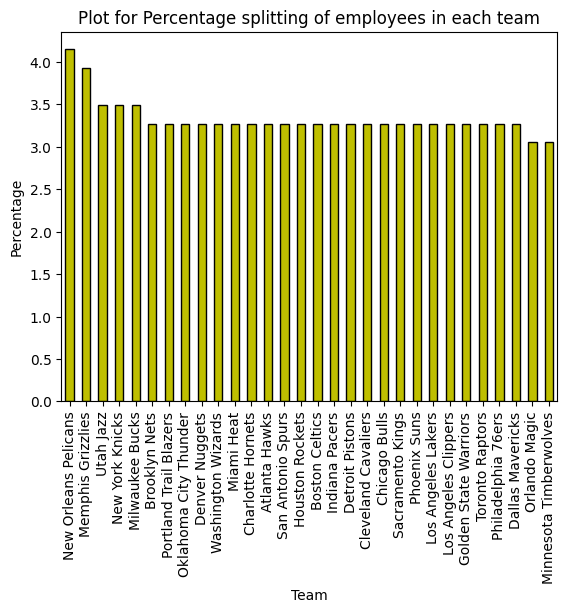

In [281]:
#Plotting the percentage splitting of employees in each team
percentage.plot(kind='bar',color='y',width=0.5,edgecolor='black')
# Customize the plot
plt.xlabel('Team')
plt.ylabel('Percentage')
plt.title('Plot for Percentage splitting of employees in each team')

## Summary
- While analysing the above bar chart where Team as x-axis and Percentage as y-axis its clear that the percentage splitting of
  New Orleans Pelicans is higher with respect to the other team members.
- 23 of the teams are having the same percentage splitting.

## 2.Segregate the employees w.r.t different positions.


In [249]:
Position=df['Position'].value_counts()
Position

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

Text(0, 0.5, 'Number of employees')

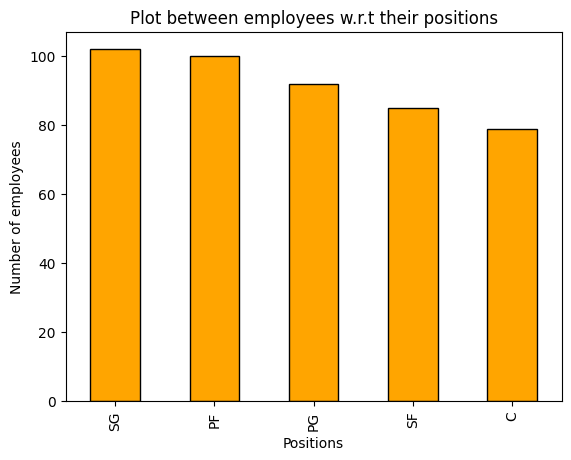

In [287]:
#plotting
Position.plot(kind='bar',color='orange',width=0.5,edgecolor='black')
# Customize the plot
plt.title("Plot between employees w.r.t their positions")
plt.xlabel("Positions")
plt.ylabel("Number of employees")

## Summary
- It is clear from the value_counts  of data and also from the bar chart that the most number of employees are belongs to SG position,
  and is just more than 100.
- The second greatest is PF And the least number of employees belongs to C position.

## 3.Find from which age group most of the employees belong to.


In [25]:
df['Age'].value_counts()

Age
24    47
25    46
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: count, dtype: int64

In [26]:
#Creating bins and labels
bins = [10, 20, 30, 40, 50]
labels = ['10-19', '20-29', '30-39', '40-50']
#Grouping the values using bins
age_groups = pd.cut(df.Age, bins=bins)
Group=age_groups.value_counts()
Group

Age
(20, 30]    346
(30, 40]     91
(10, 20]     21
(40, 50]      0
Name: count, dtype: int64

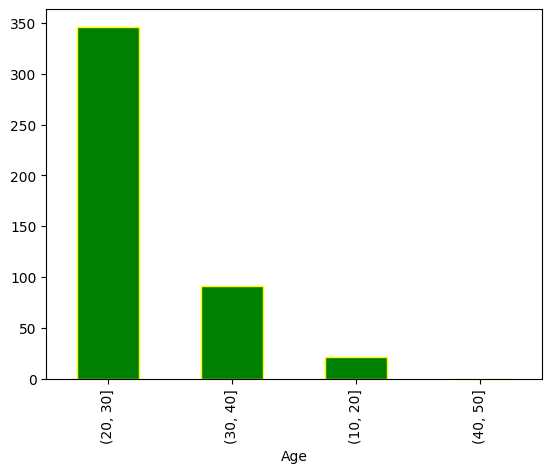

In [31]:
#plotting the group
Group.plot(kind='bar',color='g',width=0.5,edgecolor='yellow')
plt.show()

## Summary
- While considering the data its clear that the most employees are belongs to the bins between 20 and 30.
- Its also clear from the graph that there is no one is older than 40 years.
- The least numbers of employees are belongs to the age between 10 and 20. 

## 4.Find out under which team and position, spending in terms of salary is high.

In [288]:
# Viewing team,position and salary
TPS=df.loc[:,['Team','Position','Salary']]
print(TPS)

               Team Position   Salary
0    Boston Celtics       PG  7730337
1    Boston Celtics       SF  6796117
2    Boston Celtics       SG        0
3    Boston Celtics       SG  1148640
4    Boston Celtics       PF  5000000
..              ...      ...      ...
453       Utah Jazz       PG  2433333
454       Utah Jazz       PG   900000
455       Utah Jazz        C  2900000
456       Utah Jazz        C   947276
457       Utah Jazz        C   947276

[458 rows x 3 columns]


In [304]:
# Counting the team and position
df[['Team','Position']].value_counts()

Team                    Position
Brooklyn Nets           SG          6
Memphis Grizzlies       PF          6
New Orleans Pelicans    SG          5
Miami Heat              SF          5
Cleveland Cavaliers     SG          5
                                   ..
Boston Celtics          SF          1
Minnesota Timberwolves  SG          1
Los Angeles Lakers      SG          1
Memphis Grizzlies       C           1
Miami Heat              C           1
Name: count, Length: 149, dtype: int64

In [33]:
#Grouping team and position w.r.to salary
spending_by_team_position = df.groupby(['Team', 'Position'])['Salary'].sum()
print(spending_by_team_position.idxmax())
print(spending_by_team_position.max())
#Maximum salaried person
print(df['Salary'].max())

('Los Angeles Lakers', 'SF')
31866445
25000000


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

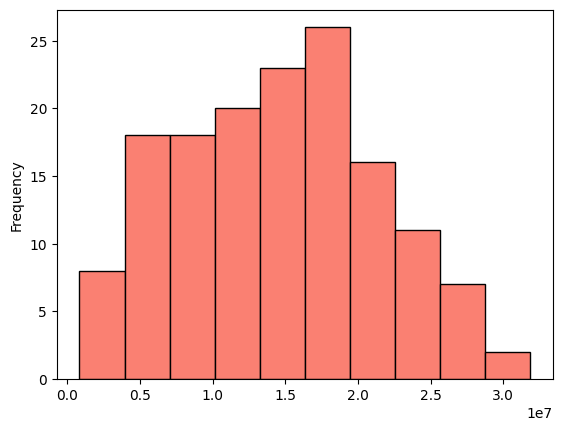

In [37]:
# Plotting the grouped items 
spending_by_team_position.plot(kind='hist',color='salmon', edgecolor='black')
plt.plot

### Summary
- While considering the data it is clear that Los Angeles Lakers team and SF position, spending in terms of salary is high.
- The histogram showing frequency distributions between the salary intervals.



## 5.Find if there is any correlation between age and salary , represent it visually.


In [38]:
#Checking age and salary columns values and checking its maximum.
print(df[['Age','Salary']])
print(df[['Age','Salary']].max())

     Age   Salary
0     25  7730337
1     25  6796117
2     27        0
3     22  1148640
4     29  5000000
..   ...      ...
453   26  2433333
454   24   900000
455   26  2900000
456   26   947276
457   25   947276

[458 rows x 2 columns]
Age             40
Salary    25000000
dtype: int64


In [40]:
print(df['Salary'].value_counts())

Salary
947276     32
845059     18
525093     13
0          11
981348      6
           ..
2100000     1
1252440     1
2891760     1
3272091     1
900000      1
Name: count, Length: 310, dtype: int64


Text(0.5, 1.0, 'Scatter Plot between age and salary')

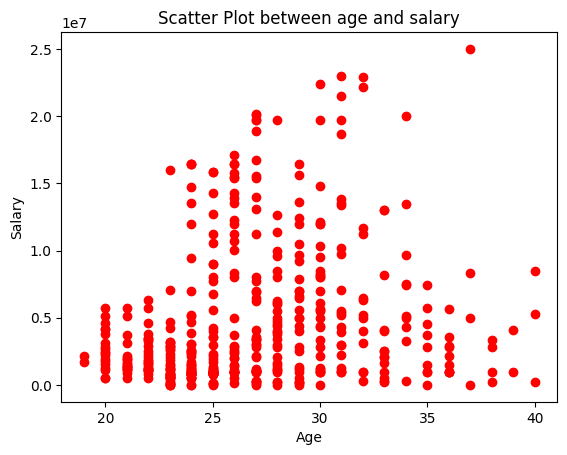

In [312]:
#plotting scatter plot in pandas
X=df.Age
Y=df.Salary
plt.scatter(X,Y,color='r')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Scatter Plot between age and salary')


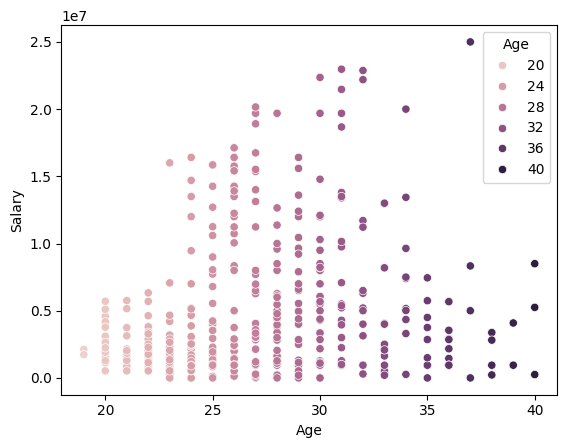

In [313]:
#plotting scatterplot in seaborn
sns.scatterplot(x=X, y=Y, hue="Age", data=df)
plt.show()

In [265]:
cormat=df[['Age','Salary']].corr()
cormat

,Age,Salary
Age,1.00000,0.20501
Salary,0.20501,1.00000


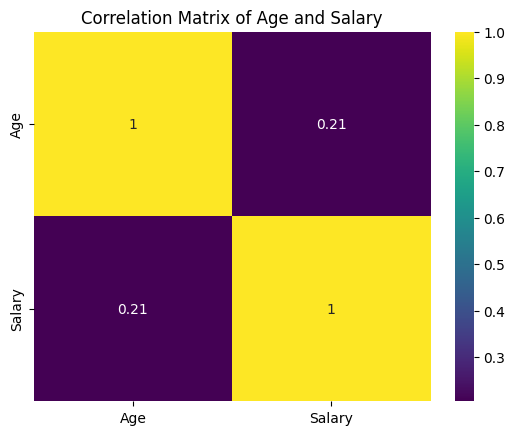

In [272]:
sns.heatmap(cormat,annot=True, cmap="viridis")
plt.title("Correlation Matrix of Age and Salary")
plt.show()


In [ ]:
#Summary
- While considering the data we get which age group will have maximum salary or is in increasing linearly or not.
- I plotted the two values by using two types of scatter plots in which one is by pandas and other is by using seaborn.
- In this plots we got some insights including maximum salaried person having the age between 35 and 40 years.
  Also we can conclude that the most number of employees are having salary below one lakh.

- While checking with correlation matrix its clear that The cormat variable will contain the correlation coefficients between 'Age' and 'Salary',
    indicating the degree of linear relationship between these two variables.
    A correlation value close to 1 indicates a strong positive linear relationship.

In [ ]:
## Iterative Analysis and Interpretation
Repeat steps based on your initial findings, delve deeper into specific aspects, create additional visualizations,
and iterate to gain more insights. Also changed some values and their type for more clarity of data.
EDA helps in understanding the data distribution, relationships, and potential issues.
